# Importações das Bibliotecas e criação das funções auxiliares

In [1]:
import numpy as np # Biblioteca para manipulação de matrizes
import pandas as pd # Biblioteca para manipulação de datasets
from sklearn import metrics
import pandas as pd
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

import time # Bibliteca para cálculo de tempo
start_time = time.time()

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def OHE(Dataset,column):

   ### Função de transformação categórica ###

  ''' Esta função trasnforma as variáveis categóricas em valores numéricos pertencentes para utilização no modelo 
      de Machine Learning'''


  enc = LabelEncoder()
  ohe = OneHotEncoder()

  target = enc.fit_transform(Dataset[column])
  target = target.reshape(len(target),1)
  target = ohe.fit_transform(target)
  return target


In [3]:
def mapping_class(data, map_class):

  ### Função de mapeamento de classe ###

  ''' Esta função realiza o mapeamento da série de entrada utilizando um dicionário pré-definido'''

  dataframe = pd.DataFrame(data)
  transf = dataframe[0].map(map_class)


  return transf

In [4]:
from sklearn.model_selection import GridSearchCV

### Funções para utilização da validação cruzada ###

''' Estas funções são utilizadas para realizar o método de validação cruzada através do GridSearchCV
      a fim de encontrar os melhores hiperparâmetros do modelo de Machine Learning '''


def config_param(MLmodel, param, cv= None, n_jobs=-1, scoring = 'balanced_accuracy'):
    
    grid_class = GridSearchCV(MLmodel, param, cv=cv,n_jobs=n_jobs, scoring = scoring)
    
    return MLmodel, grid_class

def get_param(MLmodel, param, X,Y):    
    
    MLmodel, grid_class = config_param(MLmodel, param)
    
    return grid_class.fit(X,Y)


def best_model(MLmodel,data_X,data_y,):
  print('----------------')
  print('Início do CVGrid')
  inicio = time.time()
  all_param = get_param(MLmodel, param, data_X,data_y)
  best_result = all_param.best_estimator_
  final = time.time() - inicio
  min = final/60 
  print('Final do CVGrid')
  print('Tempo de Execução: {} min '.format(min))
  print('----------------')
  return best_result
  
    

In [5]:
def plot_results(y_pred,y_real):

  ### Função de plotagem da matriz de confusão ###

  ''' Esta função realiza o plot da matriz de confusão para análise visual do desempenho '''

  # Criando a matrix de confusão para análise de eficiência
  cnf_matrix = metrics.confusion_matrix(y_pred, y_real)
  
  # Plotagem da matriz de confusão e um Heatmap
  class_names=[0,1] #  Nome das classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  
  # Creando o heatmap com a matriz de confusão
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("bottom")
  plt.tight_layout()
  plt.title('Matriz de Confusão', y=1.1)
  plt.ylabel('Valor real')
  plt.xlabel('Valor previsto')

In [6]:
from sklearn.preprocessing import StandardScaler # Normalização

def normalize(X):

  ### Função de normalização ###

  ''' Esta função normaliza as variáveis numéricas para utilização no modelo 
      de Machine Learning'''
      
  scaler = StandardScaler()
  scaler.fit(X)
  normalized = scaler.transform(X)
  dataframe = pd.DataFrame(normalized)
  return dataframe



In [7]:
from sklearn.decomposition import PCA # Principal Component Analysis (PCA)

def PCA_apply(data, n_components):

  ### Função de redutora de dimensionalidade ###

  ''' Esta função reduz a dimensionalidade do conjunto de dados para melhor visualização/ explicação do dataset'''
  
  pca = PCA(n_components)
  reduced = pca.fit_transform(data)
  dataframe = pd.DataFrame(reduced)
  return dataframe
  


In [8]:
from imblearn.over_sampling import SMOTE

def SMOTE_apply(data_X, data_y, aproach):

  ### Função de aplicação do SMOTE ###

  ''' Esta função aplica a metodologia de Synthetic Minority Oversampling Technique
      para balancear o modelo de treino com mais amostras da classe minoritária'''
      
  smote = SMOTE(sampling_strategy=aproach)
  X_balanc, y_balanc = smote.fit_resample(data_X, data_y)
  return X_balanc, y_balanc



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
def ROC_Plot(y_true, y_score):

  ### Função Plotagem Gráfico ROC ###

  ''' Esta função realiza a plotagem do gráfico de análise ROC '''

  TPR, FPR, thresholds = metrics.roc_curve(y_true, y_score)
  plt.plot(TPR, FPR, label='ROC')
  plt.plot([0, 1], [0, 1], label='Random Choice')
  plt.legend(loc='best')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('Curva ROC do modelo')
  plt.show()



In [10]:
def bin_metrics(y_true, y_pred, y_score):

   ### Função de cálculo de desempenho do classificador binário ###

  ''' Esta função calcula métricas de desempenho do modelo de Machine Learning e retonra
      um vetor contendo os valores (0 < valor < 1) '''


  accur = metrics.accuracy_score(y_true, y_pred)
  precision = metrics.precision_score(y_true, y_pred)
  recall = metrics.recall_score(y_true, y_pred)
  f1 = metrics.f1_score(y_true, y_pred)
  fbeta = metrics.fbeta_score(y_true, y_pred, beta=0.5)
  balanced_score = metrics.balanced_accuracy_score(y_true, y_pred)
  roc_score = metrics.roc_auc_score(y_true, y_score)
  hinge_loss = metrics.hinge_loss(y_true, y_pred)
  harmming_loss = metrics.hamming_loss(y_true, y_pred)
  MMC = metrics.matthews_corrcoef(y_true, y_pred)
  Fm = (balanced_score + fbeta + roc_score)/3
  return accur, precision, recall, f1, fbeta, balanced_score, roc_score, MMC, Fm


In [11]:
def multi_metrics(y_true, y_pred, y_score):

  ### Função de cálculo de desempenho do classificador multiclasse ###

  ''' Esta função calcula métricas de desempenho do modelo de Machine Learning e retonra
      um vetor contendo os valores (0 < valor < 1) '''


  accur = metrics.accuracy_score(y_true, y_pred)
  precision = metrics.precision_score(y_true, y_pred, average = "weighted")
  recall = metrics.recall_score(y_true, y_pred, average = "weighted")
  f1 = metrics.f1_score(y_true, y_pred,average = "weighted")
  fbeta = metrics.fbeta_score(y_true, y_pred, beta=0.5,average = "weighted")
  balanced_score = metrics.balanced_accuracy_score(y_true, y_pred)
  roc_score = metrics.roc_auc_score(y_true, y_score, multi_class="ovr", average="weighted")
  MMC = metrics.matthews_corrcoef(y_true, y_pred)
  Fm = (balanced_score + fbeta + roc_score)/3
  return accur, precision, recall, f1, fbeta, balanced_score, roc_score, MMC, Fm



# Manipulação dos Datasets e criação dos conjuntos de treino - teste

In [12]:
data_folder_path  = '/content/drive/My Drive/Colab Notebooks/TCC/HAM10000/'
full_data = pd.read_csv(data_folder_path + 'Full_Data_HAM.csv')
full_data = full_data.drop(['Unnamed: 0'],axis=1)
full_data.head(10)

,lesion_id,image_id,age,sex,localization,Rmed,Gmed,Bmed,Rvar,Gvar,Bvar,Rstd,Gstd,Bstd,Graymed,Grayvar,Graystd,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Rmax,Rmin,Rmdn,RQ25,RQ75,Rmod,Ramp,Rsta,Rgeo,Rhar,Gmax,Gmin,Gmdn,GQ25,GQ75,Gmod,...,LUV_Lmin,LUV_Lmdn,LUV_LQ25,LUV_LQ75,LUV_Lmod,LUV_Lamp,LUV_Lsta,LUV_Lgeo,LUV_Lhar,LUV_Lmode_len,LUV_Umed,LUV_Uvar,LUV_Ustd,LUV_Umax,LUV_Umin,LUV_Umdn,LUV_UQ25,LUV_UQ75,LUV_Umod,LUV_Uamp,LUV_Usta,LUV_Ugeo,LUV_Uhar,LUV_Umode_len,LUV_Vmed,LUV_Vvar,LUV_Vstd,LUV_Vmax,LUV_Vmin,LUV_Vmdn,LUV_VQ25,LUV_VQ75,LUV_Vmod,LUV_Vamp,LUV_Vsta,LUV_Vgeo,LUV_Vhar,LUV_Vmode_len,dx,dx_type
0,HAM_0000118,ISIC_0027419,80.0,male,scalp,209.448415,157.327793,168.205956,189.754816,617.282220,1309.932821,13.775152,24.845165,36.192994,174.161897,503.293376,22.434201,201,84954.5,1242.330075,805,599,15449.835747,0.467545,243,115,213.0,204.0,218.0,217,128,10.149916,208.955208,208.414337,241,43,161.0,144.0,174.0,169,...,74.0,182.0,167.0,192.0,190.0,170.0,16.146624,176.673043,175.150473,1,119.714231,59.194400,7.693790,147,96,119.0,114.0,124.0,119,51,6.139940,119.470736,119.230784,1,135.004585,144.351402,12.014633,174,100,134.0,126.0,143.0,134,74,9.829290,134.476325,133.954398,1,bkl,histo
1,HAM_0000118,ISIC_0025030,80.0,male,scalp,215.704032,165.223978,172.542767,211.130417,728.867697,1465.497460,14.530327,26.997550,38.281816,181.162719,581.733302,24.119148,119,32015.0,750.038666,1708,762,9031.391612,0.461158,249,120,219.0,211.0,225.0,224,129,10.581372,215.168778,214.578703,245,50,170.0,150.0,185.0,180,...,78.0,189.0,173.0,201.0,197.0,168.0,17.537059,183.255095,181.548477,1,119.162069,67.197192,8.197389,147,95,118.0,113.0,125.0,109,52,6.700787,118.885870,118.615351,1,137.292009,171.412362,13.092454,174,100,137.0,128.0,146.0,141,74,10.717124,136.666446,136.039619,1,bkl,histo
2,HAM_0002730,ISIC_0026769,80.0,male,scalp,217.245680,154.120009,171.571951,140.473244,383.567722,635.195435,11.852141,19.584885,25.203084,175.002666,300.502672,17.335013,188,71911.0,1112.891477,819,1037,14135.406670,0.359704,252,124,220.0,214.0,224.0,221,128,8.190213,216.889094,216.491488,238,62,156.0,143.0,167.0,164,...,88.0,181.0,170.0,189.0,187.0,153.0,12.355941,177.619808,176.745107,1,124.456749,38.229984,6.183040,156,97,124.0,120.0,129.0,124,59,5.003167,124.302489,124.147499,1,132.167811,74.595413,8.636864,166,95,132.0,126.0,138.0,133,71,6.914110,131.887174,131.607856,1,bkl,histo
3,HAM_0002730,ISIC_0025661,80.0,male,scalp,217.004044,148.694943,163.820164,178.685848,446.033603,722.968680,13.367343,21.119508,26.888077,170.863717,354.633311,18.831710,100,21252.5,591.830514,494,576,7738.634259,0.388531,251,121,220.0,212.0,225.0,221,130,9.426366,216.548686,216.039176,233,59,150.0,136.0,163.0,150,...,84.0,176.0,165.0,186.0,179.0,156.0,13.457122,173.687976,172.640621,1,127.451380,43.599853,6.603018,151,99,128.0,123.0,132.0,129,52,5.361151,127.278152,127.102606,1,134.794506,81.932344,9.051649,165,100,134.0,128.0,141.0,133,65,7.353322,134.491828,134.190181,1,bkl,histo
4,HAM_0001466,ISIC_0031633,75.0,male,ear,183.302066,131.010777,143.193701,890.055357,769.651258,1242.885630,29.833796,27.742589,35.254583,148.045974,809.494930,28.451624,206,102446.5,1270.697607,718,488,17516.458313,0.265242,252,96,188.0,161.0,208.0,208,156,25.049993,180.689245,177.882263,238,14,130.0,113.0,150.0,126,...,61.0,154.0,134.0,173.0,155.0,182.0,22.096333,150.231753,147.496786,1,119.771113,44.687233,6.684851,163,101,119.0,115.0,124.0,119,62,5.134636,119.589968,119.413575,1,134.402528,90.789277,9.528341,169,100,134.0,127.0,141.0,135,69,7.783911,134.066462,133.732067,1,bkl,histo
5,HAM_0001466,ISIC_0027850,75.0,male,ear,178.418783,127.445182,135.393706,927.645020,827.292691,1313.682262,30.457265,28.762696,36.244755,143.606585,860.582543,29.335687,138,44224.0,828.180801,464,164,10844.111502,0.271634,252,84,182.0,156.0,203.0,200,168,25.467493,175.623151,172.621632,247,19,127.0,108.0,147.0,121,...,55.0,149.0,130.0,169.0,151.0,193.0,22.854711,145.824426,142.774948,1,119.572044,47.051535,

In [13]:
full_data['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [14]:
sex = OHE(full_data,'sex')
local = OHE(full_data,'localization')
dataset_array = np.concatenate([sex.toarray(), local.toarray()], axis=1)
dataset_array = pd.DataFrame(dataset_array)
dataset_array.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dataset_array.columns = ['Male','Female','Unkown',
                         'back', 'lower extremity',
                         'trunk','upper extremity',
                         'abdomen','face','chest',
                         'foot','unknown','neck',
                         'scalp','hand', 'ear',
                         'genital','acral']
                    
dataset_array.head(5)

,Male,Female,Unkown,back,lower extremity,trunk,upper extremity,abdomen,face,chest,foot,unknown,neck,scalp,hand,ear,genital,acral
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
full_data = full_data.drop(['lesion_id','image_id', 'sex',	'localization'],axis = 1)
full_data = pd.concat([dataset_array,full_data], axis = 1)

In [17]:
full_data.head(3)

,Male,Female,Unkown,back,lower extremity,trunk,upper extremity,abdomen,face,chest,foot,unknown,neck,scalp,hand,ear,genital,acral,age,Rmed,Gmed,Bmed,Rvar,Gvar,Bvar,Rstd,Gstd,Bstd,Graymed,Grayvar,Graystd,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Rmax,Rmin,...,LUV_Lmin,LUV_Lmdn,LUV_LQ25,LUV_LQ75,LUV_Lmod,LUV_Lamp,LUV_Lsta,LUV_Lgeo,LUV_Lhar,LUV_Lmode_len,LUV_Umed,LUV_Uvar,LUV_Ustd,LUV_Umax,LUV_Umin,LUV_Umdn,LUV_UQ25,LUV_UQ75,LUV_Umod,LUV_Uamp,LUV_Usta,LUV_Ugeo,LUV_Uhar,LUV_Umode_len,LUV_Vmed,LUV_Vvar,LUV_Vstd,LUV_Vmax,LUV_Vmin,LUV_Vmdn,LUV_VQ25,LUV_VQ75,LUV_Vmod,LUV_Vamp,LUV_Vsta,LUV_Vgeo,LUV_Vhar,LUV_Vmode_len,dx,dx_type
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80.0,209.448415,157.327793,168.205956,189.754816,617.282220,1309.932821,13.775152,24.845165,36.192994,174.161897,503.293376,22.434201,201,84954.5,1242.330075,805,599,15449.835747,0.467545,243,115,...,74.0,182.0,167.0,192.0,190.0,170.0,16.146624,176.673043,175.150473,1,119.714231,59.194400,7.693790,147,96,119.0,114.0,124.0,119,51,6.139940,119.470736,119.230784,1,135.004585,144.351402,12.014633,174,100,134.0,126.0,143.0,134,74,9.829290,134.476325,133.954398,1,bkl,histo
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80.0,215.704032,165.223978,172.542767,211.130417,728.867697,1465.497460,14.530327,26.997550,38.281816,181.162719,581.733302,24.119148,119,32015.0,750.038666,1708,762,9031.391612,0.461158,249,120,...,78.0,189.0,173.0,201.0,197.0,168.0,17.537059,183.255095,181.548477,1,119.162069,67.197192,8.197389,147,95,118.0,113.0,125.0,109,52,6.700787,118.885870,118.615351,1,137.292009,171.412362,13.092454,174,100,137.0,128.0,146.0,141,74,10.717124,136.666446,136.039619,1,bkl,histo
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80.0,217.245680,154.120009,171.571951,140.473244,383.567722,635.195435,11.852141,19.584885,25.203084,175.002666,300.502672,17.335013,188,71911.0,1112.891477,819,1037,14135.406670,0.359704,252,124,...,88.0,181.0,170.0,189.0,187.0,153.0,12.355941,177.619808,176.745107,1,124.456749,38.229984,6.183040,156,97,124.0,120.0,129.0,124,59,5.003167,124.302489,124.147499,1,132.167811,74.595413,8.636864,166,95,132.0,126.0,138.0,133,71,6.914110,131.887174,131.607856,1,bkl,histo


In [18]:
full_data.columns

Index(['Male', 'Female', 'Unkown', 'back', 'lower extremity', 'trunk',
       'upper extremity', 'abdomen', 'face', 'chest',
       ...
       'LUV_VQ25', 'LUV_VQ75', 'LUV_Vmod', 'LUV_Vamp', 'LUV_Vsta', 'LUV_Vgeo',
       'LUV_Vhar', 'LUV_Vmode_len', 'dx', 'dx_type'],
      dtype='object', length=320)

In [19]:
full_list = ['Male','Female','Unkown','back','lower extremity',	'trunk',
             'upper extremity','abdomen','face','chest','foot','unknown',
             'neck','scalp','hand','ear','genital','acral','age',
             'raio', 'area', 'perimetro', 'asymetriX', 'asymetriY',
                      'difarea',	'ampabs','Raioamp', 'Raiomax', 'Raiomin',
                      'Raiomed', 'Raiomdn', 'RaioQ25', 'RaioQ75', 'Raiosta',
                      'Raiogeo', 'Raiohar', 'AmpSup','AmpInf','Rmed_adap',
                      'Bmed_adap','Gmed_adap','Graymed_adap',
                      'Rvar_adap','Gvar_adap','Bvar_adap','Grayvar_adap',
                      'Rstd_adap','Gstd_adap','Bstd_adap','Graystd_adap',
                      'Rmax_adap','Gmax_adap','Bmax_adap','Graymax_adap',
                      'Rmin_adap','Gmin_adap','Bmin_adap','Graymin_adap',
                      'Rmdn_adap','Gmdn_adap','Bmdn_adap','Graymdn_adap',
                      'RQ25_adap','GQ25_adap','BQ25_adap','GrayQ25_adap',
                      'RQ75_adap','GQ75_adap','BQ75_adap','GrayQ75_adap',
                      'Rmod_adap','Gmod_adap','Bmod_adap','Graymod_adap',
                      'Ramp_adap','Gamp_adap','Bamp_adap','Grayamp_adap',
                      'Rsta_adap','Gsta_adap','Bsta_adap','Graysta_adap',
                      'Rgeo_adap','Ggeo_adap','Bgeo_adap','Graygeo_adap',
                      'Rhar_adap','Ghar_adap','Bhar_adap','Grayhar_adap',
                      'HSL_Hmed', 'HSL_Hvar', 'HSL_Hstd', 'HSL_Hmax', 'HSL_Hmin', 'HSL_Hmdn',
                      'HSL_HQ25', 'HSL_HQ75', 'HSL_Hmod', 'HSL_Hamp', 'HSL_Hsta', 'HSL_Hgeo',
                      'HSL_Hhar','HSL_Smed', 'HSL_Svar', 'HSL_Sstd', 'HSL_Smax', 'HSL_Smin',
                      'HSL_Smdn','HSL_SQ25', 'HSL_SQ75', 'HSL_Smod', 'HSL_Samp', 'HSL_Ssta',
                      'HSL_Sgeo','HSL_Shar', 'HSL_Lmed', 'HSL_Lvar', 'HSL_Lstd', 'HSL_Lmax',
                      'HSL_Lmin', 'HSL_Lmdn','HSL_LQ25', 'HSL_LQ75', 'HSL_Lmod', 'HSL_Lamp',
                      'HSL_Lsta', 'HSL_Lgeo','HSL_Lhar', 'HSV_Hmed', 'HSV_Hvar', 'HSV_Hstd', 
                      'HSV_Hmax', 'HSV_Hmin', 'HSV_Hmdn','HSV_HQ25', 'HSV_HQ75', 'HSV_Hmod',
                      'HSV_Hamp', 'HSV_Hsta', 'HSV_Hgeo','HSV_Hhar','HSV_Smed', 'HSV_Svar',
                      'HSV_Sstd', 'HSV_Smax', 'HSV_Smin','HSV_Smdn','HSV_SQ25', 'HSV_SQ75',
                      'HSV_Smod', 'HSV_Samp', 'HSV_Ssta', 'HSV_Sgeo','HSV_Shar','HSV_Vmed', 
                      'HSV_Vvar', 'HSV_Vstd', 'HSV_Vmax','HSV_Vmin', 'HSV_Vmdn','HSV_VQ25',
                      'HSV_VQ75', 'HSV_Vmod', 'HSV_Vamp','HSV_Vsta', 'HSV_Vgeo','HSV_Vhar',
                      'LAB_Lmed', 'LAB_Lvar', 'LAB_Lstd', 'LAB_Lmax', 'LAB_Lmin', 'LAB_Lmdn',
                      'LAB_LQ25', 'LAB_LQ75', 'LAB_Lmod', 'LAB_Lamp', 'LAB_Lsta', 'LAB_Lgeo',
                      'LAB_Lhar', 'LAB_Amed', 'LAB_Avar', 'LAB_Astd', 'LAB_Amax', 'LAB_Amin',
                      'LAB_Amdn','LAB_AQ25', 'LAB_AQ75', 'LAB_Amod', 'LAB_Aamp', 'LAB_Asta',
                      'LAB_Ageo','LAB_Ahar', 'LAB_Bmed', 'LAB_Bvar', 'LAB_Bstd', 'LAB_Bmax',
                      'LAB_Bmin', 'LAB_Bmdn','LAB_BQ25', 'LAB_BQ75', 'LAB_Bmod', 'LAB_Bamp',
                      'LAB_Bsta', 'LAB_Bgeo','LAB_Bhar','LUV_Lmed', 'LUV_Lvar', 'LUV_Lstd', 
                      'LUV_Lmax', 'LUV_Lmin', 'LUV_Lmdn','LUV_LQ25', 'LUV_LQ75', 'LUV_Lmod',
                      'LUV_Lamp', 'LUV_Lsta', 'LUV_Lgeo','LUV_Lhar', 'LUV_Umed', 'LUV_Uvar',
                      'LUV_Ustd', 'LUV_Umax', 'LUV_Umin','LUV_Umdn', 'LUV_UQ25', 'LUV_UQ75',
                      'LUV_Umod', 'LUV_Uamp', 'LUV_Usta','LUV_Ugeo', 'LUV_Uhar', 'LUV_Vmed', 
                      'LUV_Vvar', 'LUV_Vstd', 'LUV_Vmax','LUV_Vmin', 'LUV_Vmdn', 'LUV_VQ25',
                      'LUV_VQ75', 'LUV_Vmod', 'LUV_Vamp','LUV_Vsta', 'LUV_Vgeo','LUV_Vhar']

cat_list = ['Male','Female','Unkown','back','lower extremity',	'trunk',
             'upper extremity','abdomen','face','chest','foot','unknown',
             'neck','scalp','hand','ear','genital','acral','dx','dx_type']



In [20]:
X = full_data[full_list]
y = full_data['dx']



In [21]:
categorical_data = full_data[cat_list]
categorical_data = categorical_data.drop(['dx','dx_type'],axis=1)
numerical_data = full_data.drop(cat_list,axis=1)
normalized_data = normalize(numerical_data)
X_normalized = pd.concat([categorical_data, normalized_data], axis=1)
X_normalized.columns = full_data.drop(['dx','dx_type'],axis=1).columns

In [22]:
#state = np.random.randint(0,100)
state = 3
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state = state)
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized,y,
                                                                          test_size=test_size, 
                                                                          random_state = state)



In [23]:
X_train.head()

,Male,Female,Unkown,back,lower extremity,trunk,upper extremity,abdomen,face,chest,foot,unknown,neck,scalp,hand,ear,genital,acral,age,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Raioamp,Raiomax,Raiomin,Raiomed,Raiomdn,RaioQ25,RaioQ75,Raiosta,Raiogeo,Raiohar,AmpSup,AmpInf,Rmed_adap,Bmed_adap,...,LAB_Bhar,LUV_Lmed,LUV_Lvar,LUV_Lstd,LUV_Lmax,LUV_Lmin,LUV_Lmdn,LUV_LQ25,LUV_LQ75,LUV_Lmod,LUV_Lamp,LUV_Lsta,LUV_Lgeo,LUV_Lhar,LUV_Umed,LUV_Uvar,LUV_Ustd,LUV_Umax,LUV_Umin,LUV_Umdn,LUV_UQ25,LUV_UQ75,LUV_Umod,LUV_Uamp,LUV_Usta,LUV_Ugeo,LUV_Uhar,LUV_Vmed,LUV_Vvar,LUV_Vstd,LUV_Vmax,LUV_Vmin,LUV_Vmdn,LUV_VQ25,LUV_VQ75,LUV_Vmod,LUV_Vamp,LUV_Vsta,LUV_Vgeo,LUV_Vhar
6278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,261,153466.5,1627.716942,2292,3818,21524.396940,0.312659,83.238276,266.227346,182.989071,234.360833,221.785926,205.284556,238.580693,18.631606,221.590442,220.480480,18.750075,182.989071,184.501330,104.101430,...,142.493245,134.978873,798.911492,28.265022,207.0,59.0,139.0,110.0,160.0,155.0,148.0,25.157484,131.859013,128.624765,136.864957,41.071926,6.408738,153,116,137.0,132.0,142.0,143,37,5.420773,136.713821,136.561641,147.996556,12.469946,3.531281,167,131,149.0,145.0,151.0,150,36,2.909440,147.954078,147.911244
1134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,297,168700.0,1775.234622,414,724,21930.225041,0.501665,159.593425,318.127333,158.533908,249.200722,248.402899,203.531324,265.333752,33.953169,232.168907,228.529998,23.229045,158.533908,193.073187,127.666177,...,137.048769,150.214860,798.591683,28.259365,249.0,22.0,151.0,131.0,172.0,155.0,227.0,23.125163,147.383473,144.337450,129.832159,41.723928,6.459406,153,91,130.0,125.0,135.0,129,62,5.220305,129.669305,129.504123,142.836873,78.938191,8.884717,173,95,143.0,137.0,150.0,151,78,7.347710,142.556380,142.271557
9350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,67,11646.0,410.877196,262,240,5849.012540,0.237089,15.997771,67.475922,51.478151,61.400326,61.294372,58.000000,63.158531,2.819858,60.798170,60.688122,1.075620,51.478151,180.532043,100.696990,...,148.118392,142.314508,1603.754632,40.046905,247.0,50.0,145.0,106.0,176.0,168.0,197.0,34.747223,136.251087,129.890788,128.050051,98.137006,9.906412,155,99,128.0,120.0,135.0,131,56,8.316081,127.666576,127.283134,155.824738,92.903837,9.638664,184,112,156.0,149.0,163.0,163,72,7.987084,155.523048,155.217714
8811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,152,50914.5,898.766588,2120,1288,11902.872109,0.324765,50.729878,156.204994,105.475116,109.224539,129.653384,113.513211,140.188233,13.137711,127.219866,126.321544,4.086619,105.475116,168.789690,130.088306,...,137.203162,153.469226,705.933986,26.569418,192.0,7.0,159.0,139.0,175.0,177.0,185.0,20.936586,150.602017,146.720518,110.336737,29.087214,5.393256,127,96,109.0,106.0,114.0,107,31,4.518252,110.206713,110.078494,146.631924,34.151367,5.843917,165,116,146.0,143.0,152.0,147,49,4.814797,146.515133,146.398018
6215,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,164,56862.0,970.205187,933,647,13133.961830,0.332319,55.282993,166.355042,111.072049,115.108644,135.207248,121.511316,149.733091,13.831167,134.969548,134.085444,6.355042,111.072049,177.340916,57.682478,...,157.553623,111.350902,665.178437,25.791053,177.0,52.0,106.0,90.0,133.0,87.0,125.0,22.190092,108.416409,105.572929,156.318954,22.938106,4.789374,169,134,157.0,153.0,160.0,158,35,3.803657,156.244494,156.168912,157.525654,7.743061,2.782636,167,146,158.0,155.0,160.0,160,21,2.317289,157.501010,157.476299


In [24]:
X_train_normalized.head()

,Male,Female,Unkown,back,lower extremity,trunk,upper extremity,abdomen,face,chest,foot,unknown,neck,scalp,hand,ear,genital,acral,age,Rmed,Gmed,Bmed,Rvar,Gvar,Bvar,Rstd,Gstd,Bstd,Graymed,Grayvar,Graystd,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Rmax,Rmin,...,LUV_Lstd,LUV_Lmax,LUV_Lmin,LUV_Lmdn,LUV_LQ25,LUV_LQ75,LUV_Lmod,LUV_Lamp,LUV_Lsta,LUV_Lgeo,LUV_Lhar,LUV_Lmode_len,LUV_Umed,LUV_Uvar,LUV_Ustd,LUV_Umax,LUV_Umin,LUV_Umdn,LUV_UQ25,LUV_UQ75,LUV_Umod,LUV_Uamp,LUV_Usta,LUV_Ugeo,LUV_Uhar,LUV_Umode_len,LUV_Vmed,LUV_Vvar,LUV_Vstd,LUV_Vmax,LUV_Vmin,LUV_Vmdn,LUV_VQ25,LUV_VQ75,LUV_Vmod,LUV_Vamp,LUV_Vsta,LUV_Vgeo,LUV_Vhar,LUV_Vmode_len
6278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.996715,0.447387,0.144722,0.135132,-0.109368,0.237741,-0.104339,0.104128,0.398181,0.036758,0.270405,0.112442,0.284240,1.211566,1.601345,1.429529,0.203593,0.743181,1.461292,-0.666785,0.820964,0.233331,...,0.200897,0.386563,0.295597,0.383146,0.053196,0.482631,0.645313,0.006328,0.361361,0.272580,0.287471,-0.129097,0.342681,-0.238599,-0.141586,0.138142,0.462417,0.307957,0.342984,0.335345,0.564854,-0.407788,-0.075988,0.345050,0.347479,-0.028274,0.222615,-0.776206,-1.012181,0.407523,0.633388,0.279389,0.302612,0.087178,0.308740,-0.406959,-0.945028,0.231909,0.241202,-0.026447
1134,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.405678,0.720319,0.850049,0.938548,0.162262,-0.038491,0.736282,0.406793,0.112746,0.868792,0.916323,0.125401,0.297514,1.717720,1.899498,1.782152,-0.253274,-0.211147,1.534118,0.858992,1.253336,-1.455461,...,0.200325,2.189424,-0.953076,0.796873,0.704514,1.004470,0.645313,2.034089,0.130676,0.826253,0.794781,-0.129097,-0.115492,-0.220390,-0.117889,0.138142,-1.310947,-0.134130,-0.107253,-0.110470,-0.224491,1.851811,-0.182519,-0.113484,-0.111504,-0.028274,-0.338628,1.139458,1.328977,1.177346,-1.631297,-0.350042,-0.492093,-0.025185,0.403783,2.072962,1.330335,-0.351996,-0.365447,-0.026447
9350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.769827,0.321003,0.697512,0.019061,0.738868,1.897116,2.103946,0.949740,1.777618,1.944152,0.557910,1.613521,1.567648,-1.516042,-1.174396,-1.479175,-0.290251,-0.360434,-1.351676,-1.276832,1.253336,-0.086170,...,1.391278,2.103574,-0.008135,0.590009,-0.070864,1.178417,0.955519,1.264053,1.449872,0.429222,0.328347,-0.129097,-0.231593,1.355109,1.494281,0.275789,-0.743471,-0.260441,-0.428851,-0.110470,-0.111728,1.309507,1.462621,-0.243844,-0.255945,-0.028274,1.074123,1.541958,1.658692,2.588687,-0.561862,1.013726,0.699965,1.435527,1.544299,1.718687,1.658122,1.050695,1.027144,-0.026447
8811,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.071915,-0.052878,1.424857,1.021127,-0.379697,-0.142574,0.137170,-0.246822,-0.001468,0.295947,1.008687,-0.191044,-0.044098,-0.320956,-0.405825,-0.312936,0.161750,-0.037184,-0.265303,-0.569057,-1.038238,-1.660855,...,0.029582,-0.257316,-1.459295,1.072690,0.952635,1.134930,1.170277,0.956039,-0.117744,0.941041,0.871723,-0.129097,-1.385580,-0.573307,-0.616529,-1.651268,-0.956274,-1.460392,-1.329325,-1.447915,-1.464890,-0.950092,-0.555601,-1.380324,-1.374843,-0.028274,0.074178,-0.151332,-0.000822,0.150915,-0.310231,-0.035326,0.103936,0.199540,0.023611,0.360636,0.031789,0.076249,0.078428,-0.026447
6215,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.405678,0.219397,-1.202652,-1.447473,0.035967,-0.057827,-0.428331,0.270981,0.091830,-0.347303,-0.864705,-0.032798,0.131523,-0.152238,-0.289419,-0.142171,-0.127015,-0.234897,-0.044382,-0.508072,0.518303,0.324617,...,-0.049060,-0.901195,0.059361,-0.754601,-0.567106,-0.691508,-0.977303,-0.584033,0.024539,-0.563490,-0.456797,-0.129097,1.610071,-0.745039,-0.898965,1.239317,1.739239,1.571064,1.693695,1.481727,1.410580,-0.588556,-0.935347,1.616322,1.622632,-0.028274,1.259140,-0.912439,-1.339578,0.407523,1.577007,1.223536,1.295994,1.098439,1.259170,-1.292644,-1.248605,1.264664,1.270095,-0.026447


In [25]:
y_train.head()

6278    nv
1134    df
9350    nv
8811    nv
6215    nv
Name: dx, dtype: object

In [26]:
full_data_X_train = X_train
full_data_X_test = X_test

In [27]:
full_data_X_train_normalized = X_train_normalized
full_data_X_test_normalized = X_test_normalized

In [28]:
dic_cancer ={'nv' :0,
             'bkl':0,
             'bcc':1,
             'mel':1,
             'akiec':1,
             'vasc':0,
             'df':0 
             }

dic_class ={ 'nv' :0,
             'bkl':1,
             'bcc':2,
             'mel':3,
             'akiec':4,
             'vasc':5,
             'df':6 
             }

y_train_cancer    = y_train.map(dic_cancer)
y_train_class     = y_train.map(dic_class)


y_test_cancer    = y_test.map(dic_cancer)
y_test_class     = y_test.map(dic_class)

In [29]:
full_data_X_train_smote, full_data_y_train_smote = SMOTE_apply(full_data_X_train , y_train_cancer,'minority')
full_data_X_train_smote_2, full_data_y_train_smote_2 = SMOTE_apply(full_data_X_train , y_train_class,'minority')




full_data_X_train_normalized_smote, full_data_y_train_normalized_smote = SMOTE_apply(full_data_X_train_normalized ,y_train_cancer,'minority')
full_data_X_train_normalized_smote_2, full_data_y_train_normalized_smote_2 = SMOTE_apply(full_data_X_train_normalized ,y_train_class,'minority')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

# Teste presença de Câncer de Pele - Problema Binário [0] ou [1]

---



## Treinamento do modelo de Árvore de Decisões - Teste 1 - Normal

GaussianNB(priors=None, var_smoothing=1e-09)


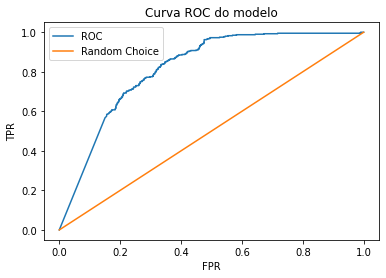

In [30]:
NBG_class = GaussianNB()
print(NBG_class)

# Treinando nosso modelo logístico
NBG_class.fit(full_data_X_train,y_train_cancer)

# Testeando a predição
y_train_pred = NBG_class.predict(full_data_X_train)
amostra_1 = NBG_class.predict(full_data_X_test)
y_score_1 = NBG_class.predict_proba(full_data_X_test)
y_score_1 = y_score_1[:,1]
ROC_Plot(y_test_cancer, y_score_1)

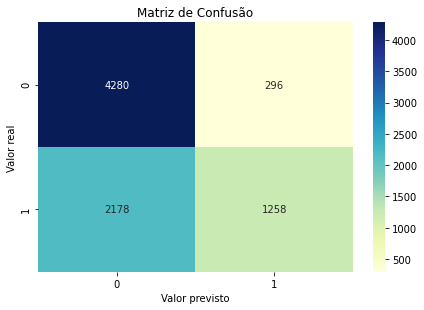

In [31]:
plot_results(y_train_pred, y_train_cancer)

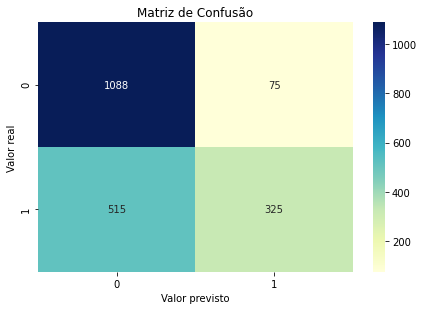

In [32]:
plot_results(amostra_1, y_test_cancer)

##  Treinamento do modelo de Árvore de Decisões - Teste 2 - Melhores parâmetros 

In [33]:
param = {'var_smoothing':[10**-9,10**-10,10**-5,10**-3,10**-15,10**-2,10**-1,
                          10**-30,]
        }

MLmodel = GaussianNB()

----------------
Início do CVGrid
Final do CVGrid
Tempo de Execução: 0.04912830591201782 min 
----------------
GaussianNB(priors=None, var_smoothing=1e-15)


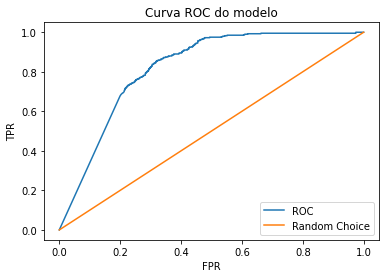

In [34]:
NBG_class = best_model(MLmodel, full_data_X_train,y_train_cancer)
print(NBG_class)

# Treinando nosso modelo logístico
NBG_class.fit(full_data_X_train,y_train_cancer)

# Testeando a predição
y_train_pred = NBG_class.predict(full_data_X_train)
amostra_2 = NBG_class.predict(full_data_X_test)
y_score_2 = NBG_class.predict_proba(full_data_X_test)
y_score_2 = y_score_2[:,1]
ROC_Plot(y_test_cancer, y_score_2)

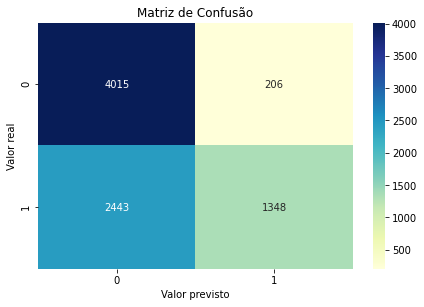

In [35]:
plot_results(y_train_pred,y_train_cancer)

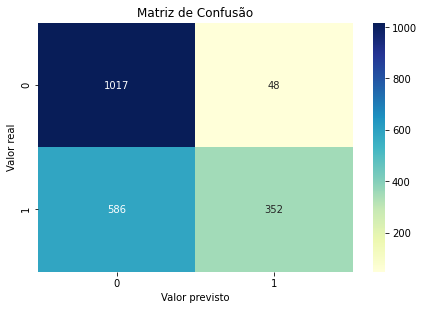

In [36]:
plot_results(amostra_2,y_test_cancer)

##  Treinamento do modelo de Árvore de Decisões - Teste 3 - Melhores parâmetros + Normalização do Dataset

----------------
Início do CVGrid
Final do CVGrid
Tempo de Execução: 0.028973197937011717 min 
----------------
GaussianNB(priors=None, var_smoothing=0.001)


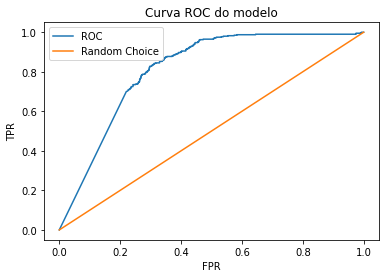

In [37]:
NBG_class = best_model(MLmodel, full_data_X_train_normalized,y_train_cancer)
print(NBG_class)

# Treinando nosso modelo logístico
NBG_class.fit(full_data_X_train_normalized,y_train_cancer)

# Testeando a predição
y_train_pred = NBG_class.predict(full_data_X_train_normalized)
amostra_3 = NBG_class.predict(full_data_X_test_normalized)
y_score_3 = NBG_class.predict_proba(full_data_X_test_normalized)
y_score_3 = y_score_3[:,1]
ROC_Plot(y_test_cancer, y_score_3)

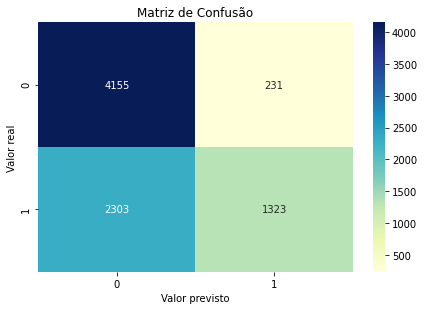

In [38]:
plot_results(y_train_pred,y_train_cancer)

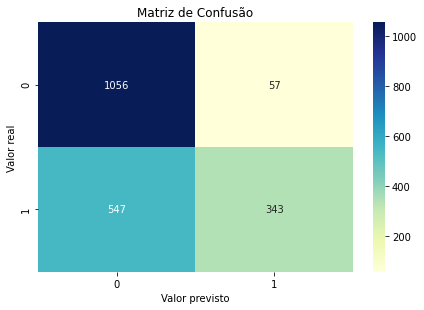

In [39]:
plot_results(amostra_3,y_test_cancer)

## Treinamento do modelo de Árvore de Decisões - Teste 4 - Melhores parâmetros + SMOTE

----------------
Início do CVGrid
Final do CVGrid
Tempo de Execução: 0.03044771353403727 min 
----------------
GaussianNB(priors=None, var_smoothing=1e-15)


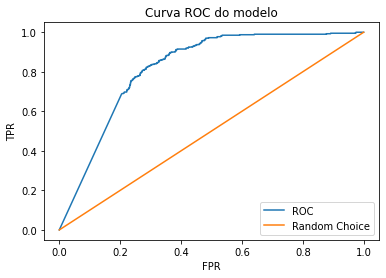

In [40]:
NBG_class = best_model(MLmodel, full_data_X_train_smote, full_data_y_train_smote)
print(NBG_class)

# Treinando nosso modelo logístico
NBG_class.fit(full_data_X_train_smote, full_data_y_train_smote)

# Testeando a predição
y_train_pred = NBG_class.predict(full_data_X_train_smote)
amostra_4 = NBG_class.predict(full_data_X_test)
y_score_4 = NBG_class.predict_proba(full_data_X_test)
y_score_4 = y_score_4[:,1]
ROC_Plot(y_test_cancer, y_score_4)


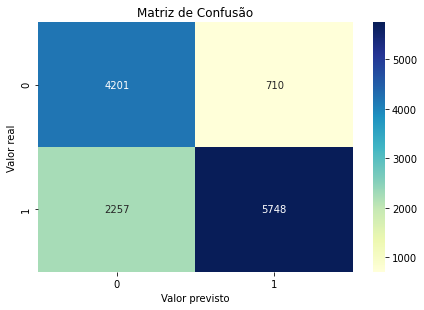

In [41]:
plot_results(y_train_pred,full_data_y_train_smote)

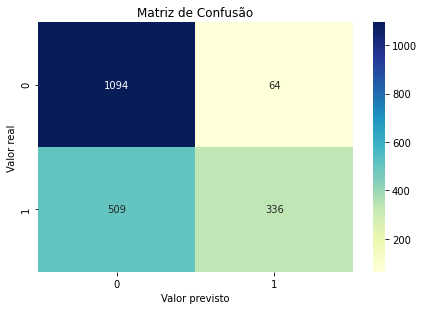

In [42]:
plot_results(amostra_4,y_test_cancer)

## Treinamento do modelo de Árvore de Decisões - Teste 5 - Melhores parâmetros + SMOTE + Normalização

----------------
Início do CVGrid
Final do CVGrid
Tempo de Execução: 0.05071945190429687 min 
----------------
GaussianNB(priors=None, var_smoothing=0.001)


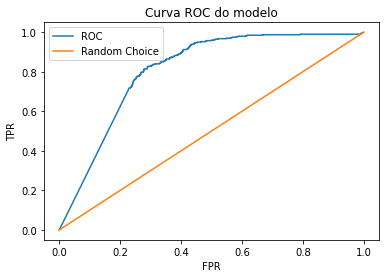

In [43]:
NBG_class = best_model(MLmodel, full_data_X_train_normalized_smote_2, full_data_y_train_normalized_smote_2)
print(NBG_class)

# Treinando nosso modelo logístico
NBG_class.fit(full_data_X_train_normalized_smote, full_data_y_train_normalized_smote)

# Testeando a predição
y_train_pred = NBG_class.predict(full_data_X_train_normalized_smote)
amostra_5 = NBG_class.predict(full_data_X_test_normalized)
y_score_5 = NBG_class.predict_proba(full_data_X_test_normalized)
y_score_5 = y_score_5[:,1]
ROC_Plot(y_test_cancer, y_score_5)

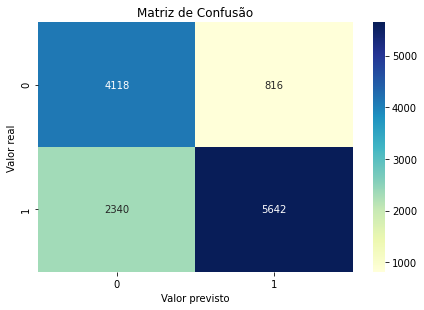

In [44]:
plot_results(y_train_pred,full_data_y_train_normalized_smote)

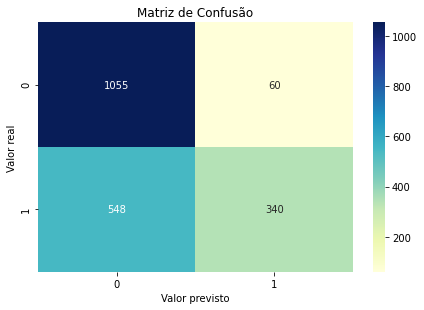

In [45]:
plot_results(amostra_5,y_test_cancer)

# Teste classificação do tipo de Imagem Multiclass - [nv = 0,bkl = 1,bcc = 2,mel = 3,akiec = 4,vasc = 5,df = 6]

---

### Treinamento do modelo de Árvore de Decisões - Teste 1 - Normal

In [46]:
NBG_class = GaussianNB()
print(NBG_class)

GaussianNB(priors=None, var_smoothing=1e-09)


In [47]:
NBG_class.fit(full_data_X_train,y_train_class)

# Testeando a predição
y_train_pred = NBG_class.predict(full_data_X_train)
Geral_1 = NBG_class.predict(full_data_X_test)
y_score_Geral_1 = NBG_class.predict_proba(full_data_X_test)

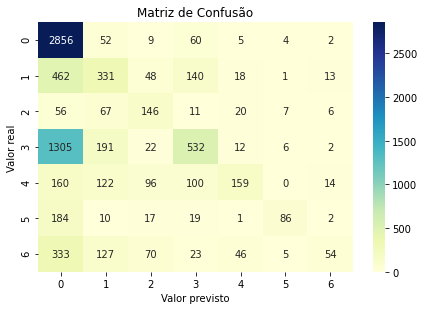

In [48]:
plot_results(y_train_pred, y_train_class)

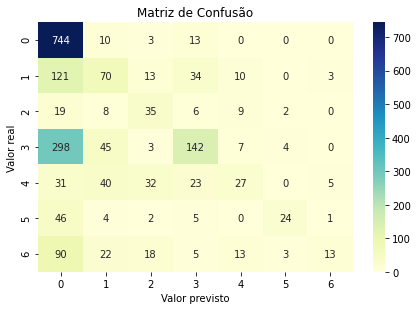

In [49]:
plot_results(Geral_1, y_test_class)

## Treinamento do modelo de Árvore de Decisões - Teste 2 - Melhores parâmetros

In [50]:
NBG_class = best_model(MLmodel, full_data_X_train,y_train_class)
print(NBG_class)

----------------
Início do CVGrid
Final do CVGrid
Tempo de Execução: 0.03331936200459798 min 
----------------
GaussianNB(priors=None, var_smoothing=1e-15)


In [51]:
NBG_class.fit(full_data_X_train,y_train_class)

# Testeando a predição
y_train_pred = NBG_class.predict(full_data_X_train)
Geral_2 = NBG_class.predict(full_data_X_test)
y_score_Geral_2 = NBG_class.predict_proba(full_data_X_test)

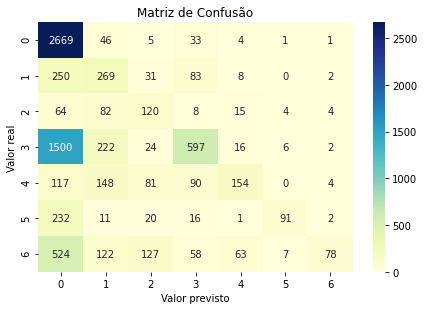

In [52]:
plot_results(y_train_pred, y_train_class)

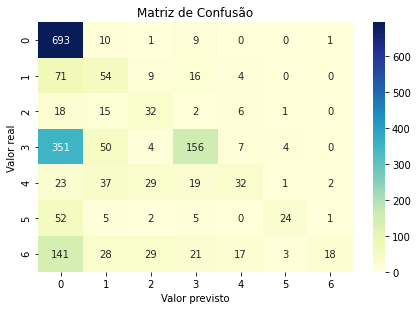

In [53]:
plot_results(Geral_2, y_test_class)

## Treinamento do modelo de Árvores de Decisões - Teste 3 - Melhores Parâmetros + Normalização

In [54]:
NBG_class = best_model(MLmodel, full_data_X_train_normalized,y_train_class)
print(NBG_class)

----------------
Início do CVGrid
Final do CVGrid
Tempo de Execução: 0.0387153148651123 min 
----------------
GaussianNB(priors=None, var_smoothing=0.001)


In [55]:
# Treinando nosso modelo logístico
NBG_class.fit(full_data_X_train_normalized,y_train_class)

# Testeando a predição
y_train_pred = NBG_class.predict(full_data_X_train_normalized)
Geral_3 = NBG_class.predict(full_data_X_test_normalized)
y_score_Geral_3 = NBG_class.predict_proba(full_data_X_test_normalized)

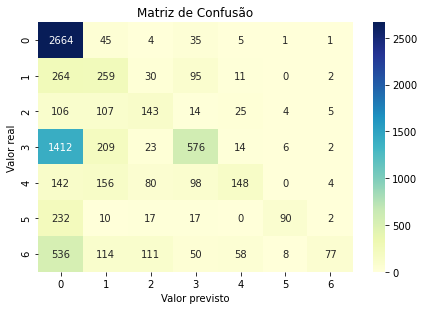

In [56]:
plot_results(y_train_pred,y_train_class)

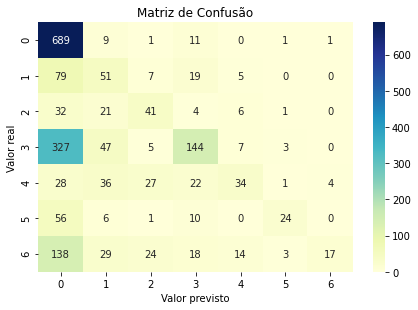

In [57]:
plot_results(Geral_3, y_test_class)

## Treinamento do modelo de Árvores de Decisões - Teste 4 - Melhores parâmetros + SMOTE

In [58]:
NBG_class = best_model(MLmodel, full_data_X_train_smote_2, full_data_y_train_smote_2)
print(NBG_class)


----------------
Início do CVGrid
Final do CVGrid
Tempo de Execução: 0.040936978658040364 min 
----------------
GaussianNB(priors=None, var_smoothing=1e-15)


In [59]:
NBG_class.fit(full_data_X_train_smote_2, full_data_y_train_smote_2)

y_train_pred = NBG_class.predict(full_data_X_train_smote_2)
Geral_4 = NBG_class.predict(full_data_X_test)
y_score_Geral_4 = NBG_class.predict_proba(full_data_X_test)

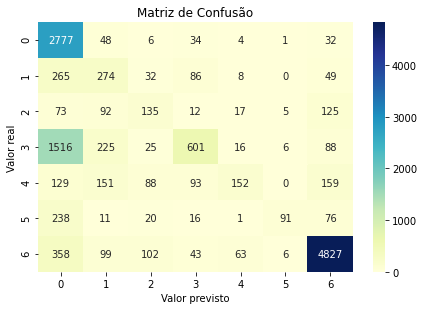

In [60]:
plot_results(y_train_pred,full_data_y_train_smote_2)

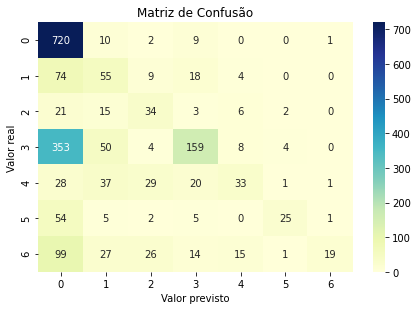

In [61]:
plot_results(Geral_4,y_test_class)

## Treinamento do modelo de Árvores de Decisões - Teste 5 - Melhores parâmetros + SMOTE + Normalização

In [62]:
NBG_class = best_model(MLmodel, full_data_X_train_normalized_smote_2, full_data_y_train_normalized_smote_2)
print(NBG_class)


----------------
Início do CVGrid
Final do CVGrid
Tempo de Execução: 0.05069119135538737 min 
----------------
GaussianNB(priors=None, var_smoothing=0.001)


In [63]:
NBG_class.fit(full_data_X_train_normalized_smote_2, full_data_y_train_normalized_smote_2)

y_train_pred = NBG_class.predict(full_data_X_train_normalized_smote_2)
Geral_5 = NBG_class.predict(full_data_X_test_normalized)
y_score_Geral_5 = NBG_class.predict_proba(full_data_X_test_normalized)

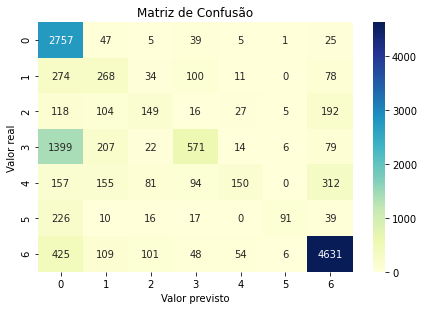

In [64]:
plot_results(y_train_pred,full_data_y_train_normalized_smote_2)

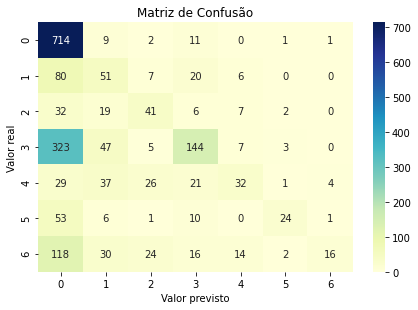

In [65]:
plot_results(Geral_5,y_test_class)

# Avaliação de desempenho de cada Teste

In [66]:
Results_bin = [bin_metrics(y_test_cancer,amostra_1, y_score_1),
               bin_metrics(y_test_cancer,amostra_2, y_score_2),
               bin_metrics(y_test_cancer,amostra_3, y_score_3), 
               bin_metrics(y_test_cancer,amostra_4, y_score_4), 
               bin_metrics(y_test_cancer,amostra_5, y_score_5)]
              
Name = np.asarray(['Amostra 4 - T1','Amostra 4 - T2','Amostra 4 - T3','Amostra 4 - T4','Amostra 4 - T5'])

Name = Name.reshape(5,1)
Name = pd.DataFrame(Name)

dataframe = pd.DataFrame(Results_bin, columns=['Accur','Precision','Recall','F1', 'Fbeta', 'Balanced Score', 'ROC_Score','MMC','FM'])
Final_Result_bin = pd.concat([Name,dataframe],axis=1)
Final_Result_bin.to_csv("Resultados_NBG_Bin.csv")
Final_Result_bin


,0,Accur,Precision,Recall,F1,Fbeta,Balanced Score,ROC_Score,MMC,FM
0,Amostra 4 - T1,0.705442,0.386905,0.8125,0.524194,0.432181,0.745614,0.817368,0.397970,0.665054
1,Amostra 4 - T2,0.683475,0.375267,0.8800,0.526158,0.423892,0.757218,0.820279,0.412146,0.667130
2,Amostra 4 - T3,0.698452,0.385393,0.8575,0.531783,0.433081,0.758132,0.812173,0.415362,0.667795
3,Amostra 4 - T4,0.713929,0.397633,0.8400,0.539759,0.444444,0.761235,0.819631,0.422937,0.675104
4,Amostra 4 - T5,0.696455,0.382883,0.8500,0.527950,0.430162,0.754070,0.809649,0.408919,0.664627


In [67]:
Results_all = [multi_metrics(y_test_class,Geral_1, y_score_Geral_1),
               multi_metrics(y_test_class,Geral_2, y_score_Geral_2),
               multi_metrics(y_test_class,Geral_3, y_score_Geral_3),
               multi_metrics(y_test_class,Geral_4, y_score_Geral_4),
               multi_metrics(y_test_class,Geral_5, y_score_Geral_5),
               ]
              
Name = np.asarray(['Amostra 4 - T1','Amostra 4 - T2','Amostra 4 - T3','Amostra 4 - T4','Amostra 4 - T5'])

Name = Name.reshape(5,1)
Name = pd.DataFrame(Name)


dataframe = pd.DataFrame(Results_all, columns=['Accur','Precision','Recall','F1', 'Fbeta', 'Balanced Score', 'ROC_Score','MMC','FM'])
Final_Result_geral = pd.concat([Name,dataframe],axis=1)
Final_Result_geral.to_csv("Resultados_NBG_All.csv")
Final_Result_geral


,0,Accur,Precision,Recall,F1,Fbeta,Balanced Score,ROC_Score,MMC,FM
0,Amostra 4 - T1,0.526710,0.745618,0.526710,0.584692,0.665769,0.511935,0.849145,0.351758,0.675616
1,Amostra 4 - T2,0.503744,0.755033,0.503744,0.564071,0.658521,0.543067,0.856658,0.345405,0.686082
2,Amostra 4 - T3,0.499251,0.746838,0.499251,0.559865,0.652168,0.542936,0.847634,0.338508,0.680913
3,Amostra 4 - T4,0.521717,0.754012,0.521717,0.576982,0.665357,0.564207,0.858902,0.359616,0.696155
4,Amostra 4 - T5,0.510235,0.745737,0.510235,0.569816,0.657612,0.534761,0.849041,0.343661,0.680471


In [68]:
final_time = time.time() - start_time
final_time

36.886542081832886

In [69]:
final_time/3600

0.010246261689398024